**Описание проекта**

Данные находятся в трёх файлах:

gold_recovery_train_new.csv — обучающая выборка;

gold_recovery_test_new.csv — тестовая выборка;

gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from math import fabs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', decimal = ',')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', decimal = ',')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', decimal = ',')

In [ ]:
df_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055402755737305,9.8896484375,5.50732421875,42.19202041625977,70.54121591421571,10.411961555480957,0.89544677734375,16.904296875,2.143149375915528,...,14.01683521270752,-502.4880065917969,12.099930763244627,-504.7159423828125,9.925633430480957,-498.3102111816406,8.079666137695312,-500.4709777832031,14.151341438293455,-605.8419799804688
1,2016-01-15 01:00:00,6.0293685698980095,9.968944097095063,5.257781484127045,42.701629246897184,69.26619763433304,10.462675680986607,0.9274521342416604,16.6345140976376,2.2249303504399105,...,13.992281027962155,-505.5032621519214,11.950530849089846,-501.3315294298522,10.039245354830264,-500.16998256550005,7.984757202058972,-500.5821676717418,13.998352635403435,-599.7871842295434
2,2016-01-15 02:00:00,6.055926069440409,10.213994565804802,5.38375876850552,42.657500610812285,68.11644506978911,10.507045940742092,0.9537157271140152,16.208849166039787,2.2578891181054104,...,14.015015464791858,-502.5209008004169,11.912783055148717,-501.13338307498685,10.070913229558943,-500.129134560235,8.013876875828991,-500.5175722471782,14.028663115758542,-601.4273632284114


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   date                                                14149 non-null  object
 1   final.output.concentrate_ag                         14148 non-null  object
 2   final.output.concentrate_pb                         14148 non-null  object
 3   final.output.concentrate_sol                        13938 non-null  object
 4   final.output.concentrate_au                         14149 non-null  object
 5   final.output.recovery                               14149 non-null  object
 6   final.output.tail_ag                                14149 non-null  object
 7   final.output.tail_pb                                14049 non-null  object
 8   final.output.tail_sol                               14144 non-null  object
 9   final.

### Предобработка данных

In [ ]:
# преобразование типов данных

date_train = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_train_float = df_train.drop(['date'], axis=1).astype(float)
df_train_new = pd.concat([date_train, df_train_float], axis=1)

date_test = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_test_float = df_test.drop(['date'], axis=1).astype(float)
df_test_new = pd.concat([date_test, df_test_float], axis=1)

date_full = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_full_float = df_full.drop(['date'], axis=1).astype(float)
df_full_new = pd.concat([date_full, df_full_float], axis=1)

In [ ]:
df_train_new = df_train_new.fillna(method='ffill')
df_test_new = df_test_new.fillna(method='ffill')
df_full_new = df_full_new.fillna(method='ffill')

пропуски в данных заполняла предыдущими значениями, так как есть временная зависимость между строками

In [ ]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

### Расчет эффективности обогащения

Эффективность обогащения рассчитывается по формуле

С(F-T)*100/F(C-T), где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
C = df_train_new['rougher.output.concentrate_au'].copy()
F = df_train_new['rougher.input.feed_au'].copy()
T = df_train_new['rougher.output.tail_au'].copy()

In [ ]:
RECOVERY = (F-T)*C*100/(F*(C-T))

In [ ]:
MAE = mean_absolute_error(RECOVERY, df_train_new['rougher.output.recovery'])
print('MAE =', MAE)

MAE = 1.0934123538501412e-14


MAE получилось очень маленьким, значит, разница в recovery посчитанном мной и в данных практически нет => можно использовать эту формулу для расчета прогнозируемых величин

### Тестирование финальных признаков

/tmp/ipykernel_31/1948402198.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 2, 1)
/tmp/ipykernel_31/1948402198.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 2, 1)
/tmp/ipykernel_31/1948402198.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

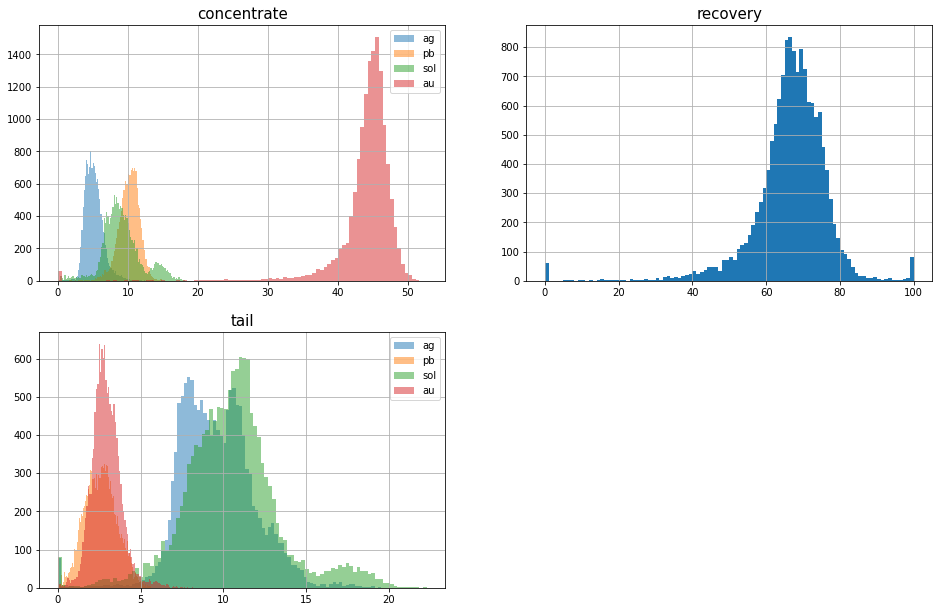

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df_train_new['final.output.concentrate_ag'].hist(bins=100, alpha=0.5, label='ag')
plt.title('concentrate', fontsize=15)

plt.subplot(3, 2, 1)
df_train_new['final.output.concentrate_pb'].hist(bins=100, alpha=0.5, label='pb')

plt.subplot(3, 2, 1)
df_train_new['final.output.concentrate_sol'].hist(bins=100, alpha=0.5, label='sol')

plt.subplot(3, 2, 1)
df_train_new['final.output.concentrate_au'].hist(bins=100, alpha=0.5, label='au')
plt.legend()

plt.subplot(3, 2, 2)
df_train_new['final.output.recovery'].hist(bins=100)
plt.title('recovery', fontsize=15)

plt.subplot(3, 2, 3)
df_train_new['final.output.tail_ag'].hist(bins=100, alpha=0.5, label='ag')
plt.title('tail', fontsize=15)

plt.subplot(3, 2, 3)
df_train_new['final.output.tail_pb'].hist(bins=100, alpha=0.5, label='pb')

plt.subplot(3, 2, 3)
df_train_new['final.output.tail_sol'].hist(bins=100, alpha=0.5, label='sol')

plt.subplot(3, 2, 3)
df_train_new['final.output.tail_au'].hist(bins=100, alpha=0.5, label='au')
plt.legend()

warnings.filterwarnings('ignore')

В конечном продукте концентрация золота хначительно превосходит концентрацию остальных металлов. Однако примерно 5% Au попадает в отвальный хвост

In [ ]:
# список колонок, отсутствующих в тестовых данных
c = list(set(df_train_new.columns) - set(df_test_new.columns))
c.sort()
c

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [ ]:
df_train_new[c].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


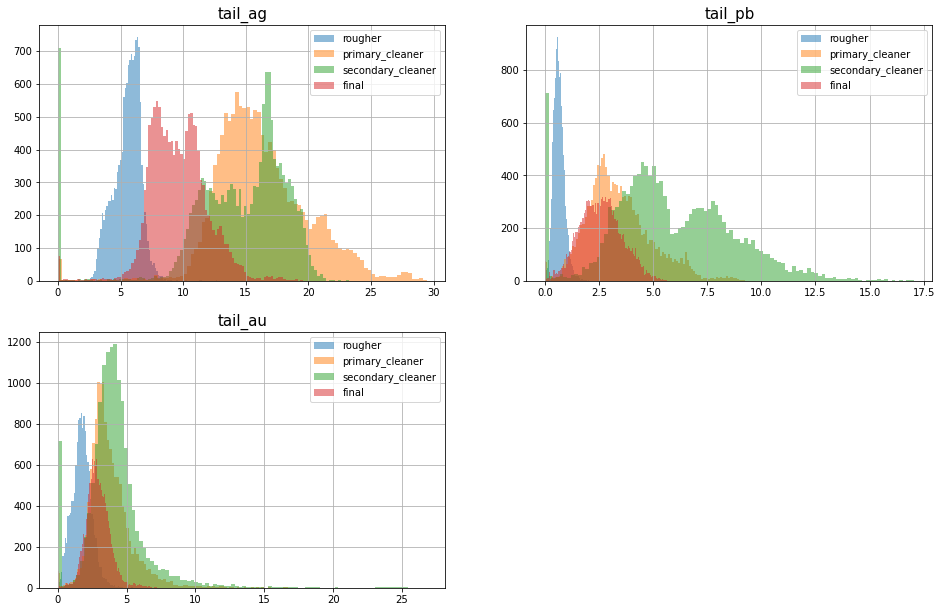

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df_train_new['rougher.output.tail_ag'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 1)
df_train_new['primary_cleaner.output.tail_ag'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 1)
df_train_new['secondary_cleaner.output.tail_ag'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 1)
df_train_new['final.output.tail_ag'].hist(bins=100, alpha=0.5, label='final')
plt.title('tail_ag', fontsize=15)
plt.legend()

plt.subplot(3, 2, 2)
df_train_new['rougher.output.tail_pb'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 2)
df_train_new['primary_cleaner.output.tail_pb'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 2)
df_train_new['secondary_cleaner.output.tail_pb'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 2)
df_train_new['final.output.tail_pb'].hist(bins=100, alpha=0.5, label='final')
plt.title('tail_pb', fontsize=15)
plt.legend()

plt.subplot(3, 2, 3)
df_train_new['rougher.output.tail_au'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 3)
df_train_new['primary_cleaner.output.tail_au'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 3)
df_train_new['secondary_cleaner.output.tail_au'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 3)
df_train_new['final.output.tail_au'].hist(bins=100, alpha=0.5, label='final')
plt.title('tail_au', fontsize=15)
plt.legend()

warnings.filterwarnings('ignore')

Исходя из графиков понятно, что основной металл, который отделяется в хвост - серебро, при чем в основном это происходит на 1 и 2 стадиях очистки. На стадии флотации отделяется меньше всего металлов.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки 

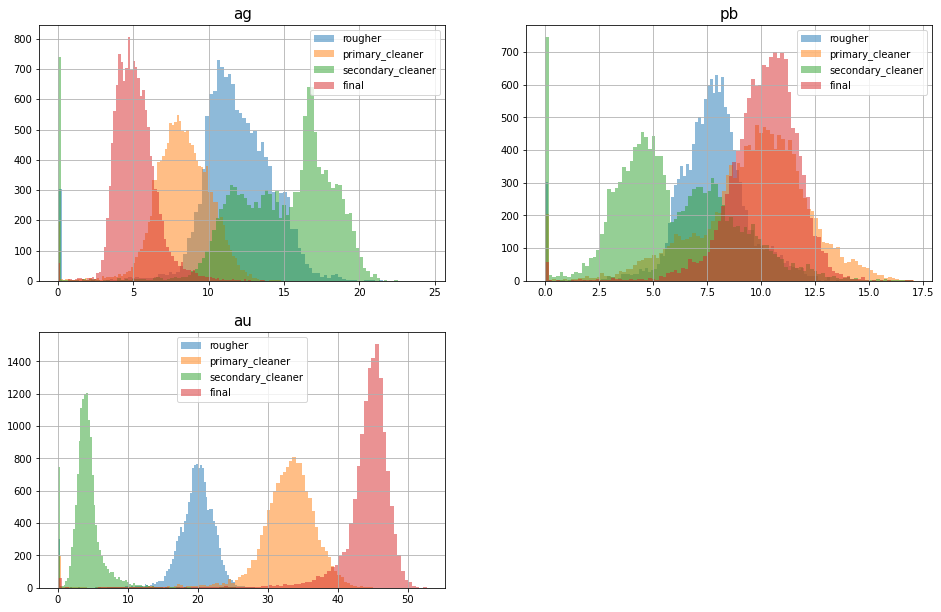

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df_train_new['rougher.output.concentrate_ag'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 1)
df_train_new['primary_cleaner.output.concentrate_ag'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 1)
df_train_new['secondary_cleaner.output.tail_ag'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 1)
df_train_new['final.output.concentrate_ag'].hist(bins=100, alpha=0.5, label='final')
plt.title('ag', fontsize=15)
plt.legend()

plt.subplot(3, 2, 2)
df_train_new['rougher.output.concentrate_pb'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 2)
df_train_new['primary_cleaner.output.concentrate_pb'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 2)
df_train_new['secondary_cleaner.output.tail_pb'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 2)
df_train_new['final.output.concentrate_pb'].hist(bins=100, alpha=0.5, label='final')
plt.title('pb', fontsize=15)
plt.legend()

plt.subplot(3, 2, 3)
df_train_new['rougher.output.concentrate_au'].hist(bins=100, alpha=0.5, label='rougher')
plt.subplot(3, 2, 3)
df_train_new['primary_cleaner.output.concentrate_au'].hist(bins=100, alpha=0.5, label='primary_cleaner')
plt.subplot(3, 2, 3)
df_train_new['secondary_cleaner.output.tail_au'].hist(bins=100, alpha=0.5, label='secondary_cleaner')
plt.subplot(3, 2, 3)
df_train_new['final.output.concentrate_au'].hist(bins=100, alpha=0.5, label='final')
plt.title('au', fontsize=15)
plt.legend()

warnings.filterwarnings('ignore')

In [ ]:
print('metal', '    rougher', '        primary_cleaner', '   secondary_cleaner', '    final')
print('ag   ', df_train_new['rougher.output.concentrate_ag'].mean(), df_train_new['primary_cleaner.output.concentrate_ag'].mean(), df_train_new['secondary_cleaner.output.tail_ag'].mean(), df_train_new['final.output.concentrate_ag'].mean())
print('pb   ', df_train_new['rougher.output.concentrate_pb'].mean(), df_train_new['primary_cleaner.output.concentrate_pb'].mean(), df_train_new['secondary_cleaner.output.tail_pb'].mean(), df_train_new['final.output.concentrate_pb'].mean())
print('au   ', df_train_new['rougher.output.concentrate_au'].mean(), df_train_new['primary_cleaner.output.concentrate_au'].mean(), df_train_new['secondary_cleaner.output.tail_au'].mean(), df_train_new['final.output.concentrate_au'].mean())

metal     rougher         primary_cleaner    secondary_cleaner     final
ag    11.775812314356036 8.200915815165981 14.281516481759926 5.141920924857091
pb    7.664554751481546 9.568544006770484 5.8469629606172315 10.132847758146394
au    19.43995785143646 32.386835978391346 4.246960901668578 44.00379162105571


Во время очистки как правило, большая часть примесей удаляется из состава сырья, однако так происходит не всегда, так как сложность очистки бывает разная. Из графиков видно, что только pb и au имеют наибольшую концентрацию после финальной стадии очистки. В то время как концентрация серебра возрастает до пика на вторичной очистке и после резко сокращается. Ту же картину можно увидеть на средних значениях концентраций

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

/tmp/ipykernel_32/2716625933.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 2, 1)


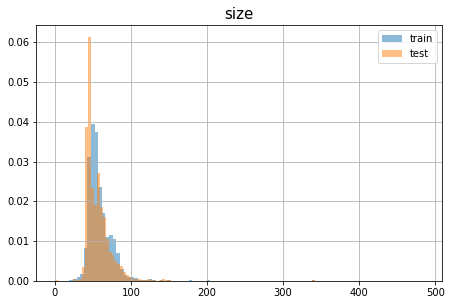

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df_train_new['rougher.input.feed_size'].hist(bins=100, alpha=0.5, label='train', density=True)
plt.subplot(3, 2, 1)
df_test_new['rougher.input.feed_size'].hist(bins=100, alpha=0.5, label='test', density=True)
plt.title('size', fontsize=15)
plt.legend()

warnings.filterwarnings('ignore')

In [ ]:
print('train:', df_train_new.agg({'rougher.input.feed_size': ['mean','median','var']}))

train:         rougher.input.feed_size
mean                  60.239856
median                55.269784
var                  529.244270


In [ ]:
print('test:', df_test_new.agg({'rougher.input.feed_size': ['mean','median','var']}))

test:         rougher.input.feed_size
mean                  55.952754
median                50.846843
var                  364.059149


Размер гранул в тренировочной и тестовой выборках похожи. Распределения этих значений имеют схожие черты. Вижимо из-за разницы в размере выборок агрегированные показатели по тестовой выборке немного меньше показателей на тренировочной выборке

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [ ]:
sum_concentration = pd.DataFrame()
sum_concentration['rougher_input'] = df_train_new['rougher.input.feed_ag'] +\
    df_train_new['rougher.input.feed_pb'] + df_train_new['rougher.input.feed_au']      
sum_concentration['rougher_output'] = df_train_new['rougher.output.concentrate_ag'] +\
    df_train_new['rougher.output.concentrate_pb'] + df_train_new['rougher.output.concentrate_au']
sum_concentration['final'] = df_train_new['final.output.concentrate_ag'] +\
    df_train_new['final.output.concentrate_pb'] + df_train_new['final.output.concentrate_au']

In [ ]:
sum_concentration[sum_concentration == 0].count()

rougher_input       0
rougher_output    297
final              58
dtype: int64

In [ ]:
list_of_0 = set(sum_concentration[sum_concentration.rougher_output == 0].index) ^\
            set(sum_concentration[sum_concentration.final == 0].index)
list_of_not_0 = set(df_train_new.index) - list_of_0

df_train_new = df_train_new.iloc[list(list_of_not_0)]

In [ ]:
sum_concentration = pd.DataFrame()
sum_concentration['rougher_input'] = df_train_new['rougher.input.feed_ag'] +\
    df_train_new['rougher.input.feed_pb'] + df_train_new['rougher.input.feed_au']      
sum_concentration['rougher_output'] = df_train_new['rougher.output.concentrate_ag'] +\
    df_train_new['rougher.output.concentrate_pb'] + df_train_new['rougher.output.concentrate_au']
sum_concentration['final'] = df_train_new['final.output.concentrate_ag'] +\
    df_train_new['final.output.concentrate_pb'] + df_train_new['final.output.concentrate_au']

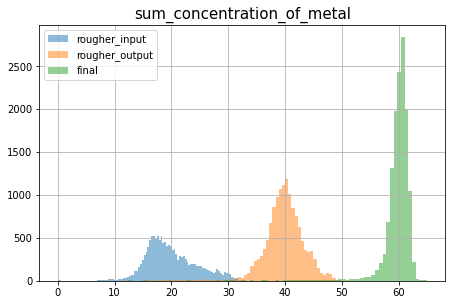

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
sum_concentration['rougher_input'].hist(bins=100, alpha=0.5, label='rougher_input')
plt.subplot(3, 2, 1)
sum_concentration['rougher_output'].hist(bins=100, alpha=0.5, label='rougher_output')
plt.subplot(3, 2, 1)
sum_concentration['final'].hist(bins=100, alpha=0.5, label='final')
plt.title('sum_concentration_of_metal', fontsize=15)
plt.legend()

warnings.filterwarnings('ignore')

In [ ]:
print('ag_function','  rougher_input', '    rougher_output', '    final')
print('mean       ', sum_concentration['rougher_input'].mean(), sum_concentration['rougher_output'].mean(), sum_concentration['final'].mean())
print('median     ', sum_concentration['rougher_input'].median(), sum_concentration['rougher_output'].median(), sum_concentration['final'].median())
print('var        ', sum_concentration['rougher_input'].var(), sum_concentration['rougher_output'].var(), sum_concentration['final'].var())

ag_function   rougher_input     rougher_output     final
mean        19.92163325343002 39.711688510282706 59.50963782433263
median      19.155503539005956 39.92264543200895 60.247172755429844
var         19.545353964189378 15.846704971385407 17.859667066106446


Ссумарная концентрация веществ с каждым этапом очистки имеет убывающую среднюю стандартную величину отклонения распределения значений, как видно из графиков. При этом дисперсия этих величин достигает максимума после этапа флотации

## Модель

### Функция вычисления итогового sMAPE

In [ ]:
def sMAPE(y, y_hat):
    return (2/len(y)) * sum(abs(y - y_hat)/(abs(y) + abs(y_hat) + 0.001))
# добавила 0,001 в знаменатель, так как в некоторых случаях встречаются 0-ый концентрации

def sMAPE_final(target_rougher, prediction_rougher, target_final, prediction_final):
    sMAPE_r = sMAPE(target_rougher, prediction_rougher)
    sMAPE_f = sMAPE(target_final, prediction_final)
    sMAPE_final = sMAPE_r * 0.25 + sMAPE_f * 0.75
    return sMAPE_final

### Обучение моделей и оценка их качества кросс-валидацией

In [ ]:
# список колонок, отсутствующих в тестовых данных
c = list(set(df_train_new.columns) - set(df_test_new.columns))

In [ ]:
# подготовка параметров

features_train = df_train_new.drop(c, axis=1)
features_train = features_train.drop(['date'], axis=1)
target_train_rougher = df_train_new['rougher.output.recovery']
target_train_final = df_train_new['final.output.recovery']
   
features_test = df_test_new.drop(['date'], axis=1)

features_full = df_full_new.drop(c, axis=1)
features_full = features_full.drop(['date'], axis=1)
target_full_rougher = df_full_new['rougher.output.recovery']
target_full_final = df_full_new['final.output.recovery']

In [ ]:
# нормализация

numeric = list(features_train.columns)

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train_norm = scaler.transform(features_train[numeric])

scaler = StandardScaler()
scaler.fit(features_test[numeric])
features_test_norm = scaler.transform(features_test[numeric])

scaler = StandardScaler()
scaler.fit(features_full[numeric])
features_full_norm = scaler.transform(features_full[numeric])

#### линейная регрессия

In [ ]:
lmodel_rougher = LinearRegression()
lmodel_rougher.fit(features_train_norm, target_train_rougher) 
print('кросс-валидация после флотации', cross_val_score(lmodel_rougher, features_train_norm, target_train_rougher, 
                                                        scoring='neg_mean_squared_error', cv=3).mean())

lmodel_final = LinearRegression()
lmodel_final.fit(features_train_norm, target_train_final) 
print('кросс-валидация после очистки', cross_val_score(lmodel_final, features_train_norm, target_train_final, 
                                                       scoring='neg_mean_squared_error', cv=3).mean())

кросс-валидация после флотации -117.82693197991436
кросс-валидация после очистки -125.01698948399302


In [ ]:
sMAPE_final_linear = sMAPE_final(target_train_rougher, lmodel_rougher.predict(features_train_norm), 
                                 target_train_final, lmodel_final.predict(features_train_norm))
sMAPE_final_linear

0.07258316170148509

#### решающее дерево

In [ ]:
tmodel_rougher = DecisionTreeRegressor(random_state=12345, max_depth=55)
tmodel_rougher.fit(features_train_norm, target_train_rougher)
print('кросс-валидация после флотации', cross_val_score(tmodel_rougher, features_train_norm, target_train_rougher, 
                                                        scoring='neg_mean_squared_error', cv=3).mean())

tmodel_final = DecisionTreeRegressor(random_state=12345, max_depth=55)
tmodel_final.fit(features_train_norm, target_train_final)
print('кросс-валидация после очистки', cross_val_score(tmodel_final, features_train_norm, target_train_final, 
                                                        scoring='neg_mean_squared_error', cv=3).mean())
sMAPE_final_linear = sMAPE_final(target_train_rougher, lmodel_rougher.predict(features_train_norm), 
                                 target_train_final, lmodel_final.predict(features_train_norm))


кросс-валидация после флотации -104.95880977497914
кросс-валидация после очистки -204.82988375765873


In [ ]:
sMAPE_final_linear = sMAPE_final(target_train_rougher, tmodel_rougher.predict(features_train_norm), 
                                 target_train_final, tmodel_final.predict(features_train_norm))
sMAPE_final_linear

9.032088561193939e-21

#### случайный лес

In [ ]:
rmodel_rougher = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=55)
distributions = {'n_estimators': [15, 20, 25, 30], 'max_depth': [50, 55, 60, 65, 70]}
clf = RandomizedSearchCV(rmodel_rougher, distributions, random_state=0)
search = clf.fit(features_train_norm, target_train_rougher)
search.best_params_

{'n_estimators': 30, 'max_depth': 70}

In [ ]:
rmodel_rougher_ = RandomForestRegressor(random_state=12345, n_estimators=30, max_depth=70)
rmodel_rougher_.fit(features_train_norm, target_train_rougher)
print('кросс-валидация после флотации', cross_val_score(rmodel_rougher_, features_train_norm, target_train_rougher, 
                                                        scoring='neg_mean_squared_error', cv=3).mean())

кросс-валидация после флотации -79.80647468281988


In [ ]:
sMAPE_final_linear = sMAPE_final(target_train_rougher, rmodel_rougher_.predict(features_train_norm), 
                                 target_train_final, rmodel_rougher_.predict(features_train_norm))
sMAPE_final_linear

0.18522696890068338

In [ ]:
rmodel_final = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=55)
clf_final = RandomizedSearchCV(rmodel_final, distributions, random_state=0)
search_final = clf_final.fit(features_train_norm, target_train_final)
search_final.best_params_

{'n_estimators': 20, 'max_depth': 70}

In [ ]:
rmodel_final_ = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=70)
rmodel_final_.fit(features_train_norm, target_train_final)
print('кросс-валидация после очистки', cross_val_score(rmodel_final_, features_train_norm, target_train_final, 
                                                       scoring='neg_mean_squared_error', cv=3).mean())

кросс-валидация после очистки -95.08527429299725


In [ ]:
sMAPE_final_linear = sMAPE_final(target_train_rougher, search_final.predict(features_train_norm), 
                                 target_train_final, search_final.predict(features_train_norm))
sMAPE_final_linear

0.07778191803279386

Среди трех моделей лучше всего, по метрике средней квадратичной ошибки, себя показала модель случайного леса. Наименьшее sMAPE_final у модели решающего дерева. Однако этот результат выглядит не правдоподобно. Модель явно переобучилась

### Проверка модели на тестовой выборке

In [ ]:
rmodel_rougher_prediction_test = rmodel_rougher.predict(features_test_norm)
rmodel_final_prediction_test = rmodel_final.predict(features_test_norm)

я не поняла, как можно проверить работу моделей на тестовой выборке, ведь там нет целевых признаков. И если rougher.output.recovery (но все rougher.output нужно чем то тоже заменить) еще можно посчитать, то final.output.recovery уже явно не получится. Поэтому я посчитала sMAPE_final по полной выборке.

In [ ]:
sMAPE_final_full = sMAPE_final(target_full_rougher, tmodel_rougher.predict(features_full_norm), 
                                 target_full_final, tmodel_final.predict(features_full_norm))
sMAPE_final_full

0.12491398234048452

In [ ]:
sMAPE_final_full = sMAPE_final(target_full_rougher, rmodel_rougher_.predict(features_full_norm), 
                                 target_full_final, search_final.predict(features_full_norm))
sMAPE_final_full

0.08150071858300699

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_norm, target_train_rougher)
print('кросс-валидация после очистки', cross_val_score(dummy_regr, features_train_norm, target_train_rougher, 
                                                       scoring='neg_mean_squared_error', cv=3).mean())

кросс-валидация после очистки -86.91218068934047


In [ ]:
sMAPE_final_full = sMAPE_final(target_full_rougher, dummy_regr.predict(features_full_norm), 
                                 target_full_final, dummy_regr.predict(features_full_norm))
sMAPE_final_full

0.21107475731000594

In [ ]:
dummy_regr_final = DummyRegressor(strategy="mean")
dummy_regr_final.fit(features_train_norm, target_train_final)
print('кросс-валидация после очистки', cross_val_score(dummy_regr_final, features_train_norm, target_train_final, 
                                                       scoring='neg_mean_squared_error', cv=3).mean())

кросс-валидация после очистки -96.32362949009269


In [ ]:
sMAPE_final_full = sMAPE_final(target_full_rougher, dummy_regr_final.predict(features_full_norm), 
                                 target_full_final, dummy_regr_final.predict(features_full_norm))
sMAPE_final_full

0.15056836845240104

Как и предполагалось, модель решающего дерева переобучилась, и значение sMAPE_final на полной выборке получилось 3,56%, при том, что большую часть датасета модель знаест на 100%. А вот модель случайного леса показала неплохой результат - 2,8% (при 2,36 на тренировочной выборке). Значит что на тестовой выборке она справилась не сильно хуже, чем на тренировочной. 

Спасибо за работу)
Хорошего дня! 